PROJECT DONE BY MAUZUM SHAMIL A M ON SKIN DISEASE DETECTION WITH DEEP LEARNING MODEL

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import keras
from keras.models import Sequential
from keras.layers import Dense,Flatten,BatchNormalization,Dropout,Conv2D,MaxPooling2D
from PIL import Image

from keras.utils import to_categorical,plot_model
import os

In [2]:
def get_folder_names(path):
    # Initialize an empty list to store folder names
    folder_names = []

    # Iterate over all items in the directory
    for item in os.listdir(path):
        # Check if the item is a directory
        if os.path.isdir(os.path.join(path, item)):
            # If it's a directory, add its name to the list
            folder_names.append(item)

    # Convert the list of folder names to a tuple
    folder_tuple = tuple(folder_names)
    
    return folder_tuple

# Specify the path to the folder on your desktop
desktop_path = os.path.join(os.path.expanduser("~"), "Desktop", "skin_disease")

# Call the function to get the folder names and create a tuple
folder_tuple = get_folder_names(desktop_path)

# Print the tuple containing the folder names
print(folder_tuple)


('Acne and Rosacea', 'Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions', 'Atopic Dermatitis Photos', 'Cellulitis Impetigo and other Bacterial Infections', 'Eczema Photos', 'Exanthems and Drug Eruptions', 'Herpes HPV and other STDs Photos', 'Light Diseases and Disorders of Pigmentation', 'Lupus and other Connective Tissue diseases', 'Melanoma Skin Cancer Nevi and Moles', 'Poison Ivy Photos and other Contact Dermatitis', 'Psoriasis pictures Lichen Planus and related diseases', 'Seborrheic Keratoses and other Benign Tumors', 'Systemic Disease', 'Tinea Ringworm Candidiasis and other Fungal Infections', 'Urticaria Hives', 'Vascular Tumors', 'Vasculitis Photos', 'Warts Molluscum and other Viral Infections')


In [3]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

encoder.fit(['Acne and Rosacea', 'Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions', 'Atopic Dermatitis Photos', 'Cellulitis Impetigo and other Bacterial Infections', 'Eczema Photos', 'Exanthems and Drug Eruptions', 'Herpes HPV and other STDs Photos', 'Light Diseases and Disorders of Pigmentation', 'Lupus and other Connective Tissue diseases', 'Melanoma Skin Cancer Nevi and Moles', 'Poison Ivy Photos and other Contact Dermatitis', 'Psoriasis pictures Lichen Planus and related diseases', 'Seborrheic Keratoses and other Benign Tumors', 'Systemic Disease', 'Tinea Ringworm Candidiasis and other Fungal Infections', 'Urticaria Hives', 'Vascular Tumors', 'Vasculitis Photos', 'Warts Molluscum and other Viral Infections'])

LabelEncoder()

In [4]:
# Move os.walk() loop inside the loop where you define class_result
data = []
result = []
for disease_folder in ['Acne and Rosacea', 'Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions', 'Atopic Dermatitis Photos', 'Cellulitis Impetigo and other Bacterial Infections', 'Eczema Photos', 'Exanthems and Drug Eruptions', 'Herpes HPV and other STDs Photos', 'Light Diseases and Disorders of Pigmentation', 'Lupus and other Connective Tissue diseases', 'Melanoma Skin Cancer Nevi and Moles', 'Poison Ivy Photos and other Contact Dermatitis', 'Psoriasis pictures Lichen Planus and related diseases', 'Seborrheic Keratoses and other Benign Tumors', 'Systemic Disease', 'Tinea Ringworm Candidiasis and other Fungal Infections', 'Urticaria Hives', 'Vascular Tumors', 'Vasculitis Photos', 'Warts Molluscum and other Viral Infections']:
    class_index = encoder.transform([disease_folder])[0]
    class_result = to_categorical(class_index,num_classes=19)

    paths = []  # Define paths list inside the loop

    # Use os.path.join() to create the directory path
    for r, d, f in os.walk(os.path.join(r"C:\Users\dell\Desktop\skin_disease", disease_folder)):
        for file in f:
            if file.endswith(('.jpg', '.jpeg')):  # Check for image files
                paths.append(os.path.join(r, file))

    for path in paths:
        img = Image.open(path)
        img = img.resize((128,128))
        img = np.array(img)
        if img.shape == (128,128,3):
            data.append(np.array(img))
            result.append(class_result)

# Model training code remains the same

# Model evaluation code remains the same

# names() function remains the same


In [5]:
# data = []
# result = []
# paths = []

# for disease_folder in ['Acne and Rosacea', 'Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions', 'Atopic Dermatitis Photos', 'Cellulitis Impetigo and other Bacterial Infections', 'Eczema Photos', 'Exanthems and Drug Eruptions', 'Herpes HPV and other STDs Photos', 'Light Diseases and Disorders of Pigmentation', 'Lupus and other Connective Tissue diseases', 'Melanoma Skin Cancer Nevi and Moles', 'Poison Ivy Photos and other Contact Dermatitis', 'Psoriasis pictures Lichen Planus and related diseases', 'Seborrheic Keratoses and other Benign Tumors', 'Systemic Disease', 'Tinea Ringworm Candidiasis and other Fungal Infections', 'Urticaria Hives', 'Vascular Tumors', 'Vasculitis Photos', 'Warts Molluscum and other Viral Infections']:
#     class_index = encoder.transform([disease_folder])[0]
#     class_result = to_categorical(class_index,num_classes=19)

# for r, d, f in os.walk(os.path.join(r"C:\Users\dell\Desktop\skin_disease" , disease_folder)):
#     for file in f:
#         if '.jpg' or ',jpeg' in file:
#             paths.append(os.path.join(r,file))

# for path in paths:
#     img = Image.open(path)
#     img = img.resize((128,128))
#     img = np.array(img)
#     if img.shape==(128,128,3):
#         data.append(np.array(img))
#         result.append(class_result)





# reshapping

In [6]:
data = np.array(data)
data.shape

(2609, 128, 128, 3)

In [7]:
result = np.array(result)
result.shape

(2609, 19)

In [9]:
result = result.reshape(2609,-1)

In [10]:
result.shape

(2609, 19)

# visualization

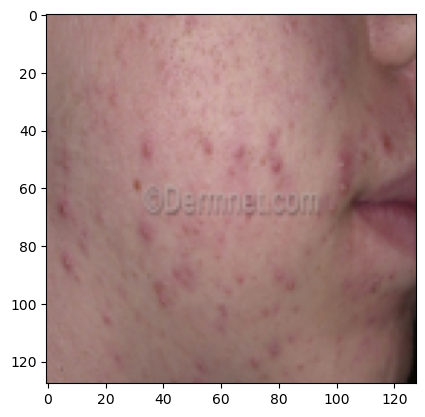

In [11]:
plt.imshow(data[0])

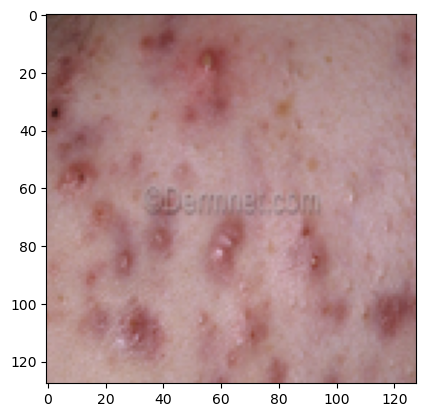

In [12]:
plt.imshow(data[100])

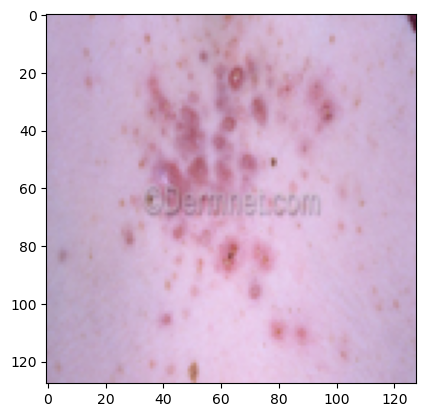

In [13]:
plt.imshow(data[200])

# data splitting

In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(data,result,test_size=0.2, shuffle=True , random_state=42)

# model building

In [15]:
model = Sequential()

model.add(Conv2D(32,kernel_size=(2,2),input_shape=(128,128,3),padding='Same'))
model.add(Conv2D(32, kernel_size=(2,2),activation='relu',padding='Same'))
model.add(Dropout(0.45))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,kernel_size=(2,2),activation='relu',padding='Same'))
model.add(Conv2D(64,kernel_size=(2,2),activation='relu',padding='Same'))
model.add(Dropout(0.45))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(512,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(19,activation='softmax'))

model.summary()

c:\Users\dell\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 128, 128, 32)   │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128, 128, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 64, 64, 64)     │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 64, 64, 64)     │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64, 64, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 65536)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    33,554,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 19)             │         9,747 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33,594,323 (128.15 MB)

 Trainable params: 33,594,131 (128.15 MB)

 Non-trainable params: 192 (768.00 B)

In [16]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [17]:
x_train.shape

(2087, 128, 128, 3)

In [18]:
y_train.shape

(2087, 19)

In [19]:
history = model.fit(x_train,y_train,epochs=20,batch_size=64,verbose=1)

Epoch 1/20


33/33 ━━━━━━━━━━━━━━━━━━━━ 45s 1s/step - accuracy: 0.1149 - loss: 38.7737
Epoch 2/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - accuracy: 0.2102 - loss: 2.7673
Epoch 3/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 44s 1s/step - accuracy: 0.2736 - loss: 2.6239
Epoch 4/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 44s 1s/step - accuracy: 0.3047 - loss: 2.6244
Epoch 5/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - accuracy: 0.3259 - loss: 2.5690
Epoch 6/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.3062 - loss: 2.5534
Epoch 7/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 44s 1s/step - accuracy: 0.3094 - loss: 2.5052
Epoch 8/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 43s 1s/step - accuracy: 0.3232 - loss: 2.4747
Epoch 9/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 44s 1s/step - accuracy: 0.3156 - loss: 2.3842
Epoch 10/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 44s 1s/step - accuracy: 0.3152 - loss: 2.4279
Epoch 11/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 45s 1s/step - accuracy: 0.3294 - loss: 2.3863
Epoch 12/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 44s 1s/step - accuracy: 0.3242 - loss: 2.3696

In [20]:
scores = model.evaluate(x_test,y_test,batch_size=64)
print("the accuracy score: %.1f%% " % (100 * scores[1]))

9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 174ms/step - accuracy: 0.3228 - loss: 2.5574
the accuracy score: 33.9% 


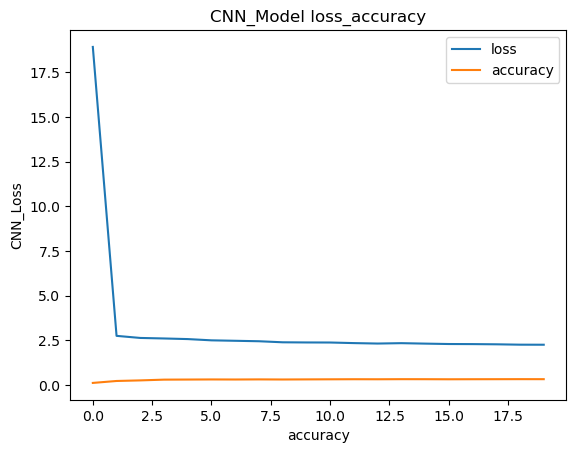

In [21]:
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.title('CNN_Model loss_accuracy')
plt.ylabel('CNN_Loss')
plt.xlabel('accuracy')
plt.legend(['loss', 'accuracy'], loc='upper right')
plt.show()

In [22]:
def names(number):
    if number == 0:
        return 'Acne and Rosacea'
    elif number == 1:
        return 'Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions'
    elif number == 2:
        return 'Atopic Dermatitis Photos'
    elif number == 3:
        return 'Cellulitis Impetigo and other Bacterial Infections'
    elif number == 4:
        return 'Eczema Photos'
    elif number == 5:
        return 'Exanthems and Drug Eruptions'
    elif number == 6:
        return 'Herpes HPV and other STDs Photos'
    elif number == 7:
        return 'Light Diseases and Disorders of Pigmentation'
    elif number == 8:
        return 'Lupus and other Connective Tissue diseases'
    elif number == 9:
        return 'Melanoma Skin Cancer Nevi and Moles'
    elif number == 10:
        return 'Poison Ivy Photos and other Contact Dermatitis'
    elif number == 11:
        return 'Psoriasis pictures Lichen Planus and related diseases'
    elif number == 12:
        return 'Seborrheic Keratoses and other Benign Tumors'
    elif number == 13:
        return 'Systemic Disease'
    elif number == 14:
        return 'Tinea Ringworm Candidiasis and other Fungal Infections'
    elif number == 15:
        return 'Urticaria Hives'
    elif number == 16:
        return 'Vascular Tumors'
    elif number == 17:
        return 'Vasculitis Photos'
    else:
        return 'Warts Molluscum and other Viral Infections'


18
Warts Molluscum and other Viral Infections


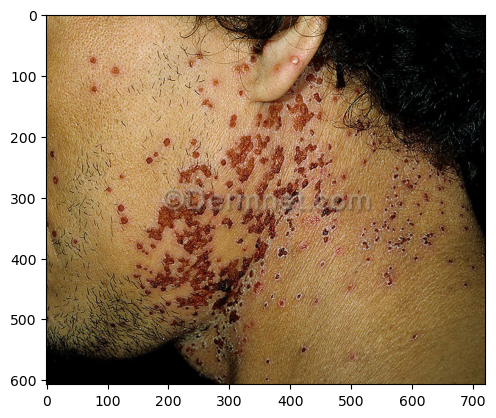

In [32]:
from matplotlib.pyplot import imshow
img  = Image.open(r"C:\Users\dell\Desktop\skin_disease\Warts Molluscum and other Viral Infections\eczema-herpeticum-3.jpg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res==np.amax(res))[1][0]
plt.imshow(img)
print(classification)
print(names(classification))

0
Acne and Rosacea


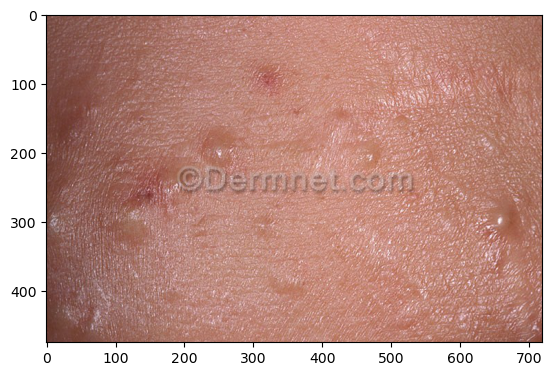

In [40]:
from matplotlib.pyplot import imshow
img  = Image.open(r"C:\Users\dell\Desktop\skin_disease\Acne and Rosacea\acne-closed-comedo-7.jpg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res==np.amax(res))[1][0]
plt.imshow(img)
print(classification)
print(names(classification))

7
Light Diseases and Disorders of Pigmentation


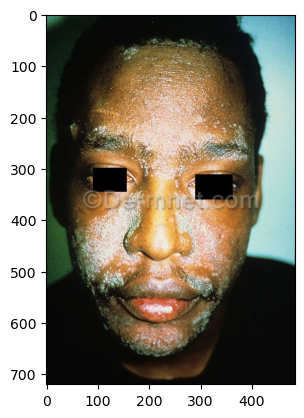

In [38]:
from matplotlib.pyplot import imshow
img  = Image.open(r"C:\Users\dell\Desktop\skin_disease\Herpes HPV and other STDs Photos\AIDS-48.jpg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res==np.amax(res))[1][0]
plt.imshow(img)
print(classification)
print(names(classification))

0
Acne and Rosacea


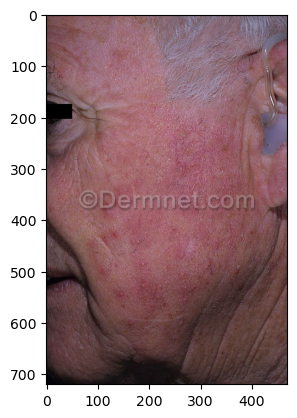

In [39]:
from matplotlib.pyplot import imshow
img  = Image.open(r"C:\Users\dell\Desktop\skin_disease\Tinea Ringworm Candidiasis and other Fungal Infections\tinea-face-17.jpg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res==np.amax(res))[1][0]
plt.imshow(img)
print(classification)
print(names(classification))